In [ ]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("shree1992/housedata")

print("Path to dataset files:", path)
csv_path = os.path.join(path, "data.csv")

df = pd.read_csv(csv_path)
print(df.head())

100%|██████████| 432k/432k [00:00<00:00, 17.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shree1992/housedata/versions/2
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0   

In [ ]:
print(df.info())

print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

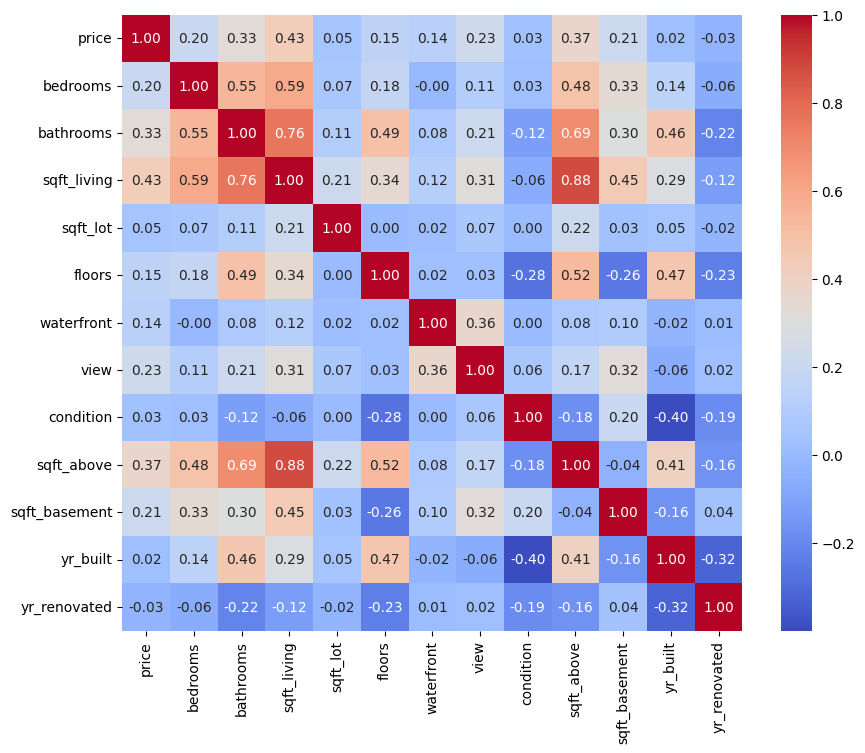

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()



In [ ]:
# feature engineering
import numpy as np
df['basement_ratio'] = df['sqft_basement'] / (df['sqft_living'] + 1e-9)
df['has_basement']   = (df['sqft_basement'] > 0).astype(int)

df['rooms']          = df['bedrooms'] + df['bathrooms']
df['bath_per_bed']   = df['bathrooms'] / (df['bedrooms'].replace(0, np.nan) + 1e-9)

df['house_age']      = 2015 - df['yr_built']
df['renovated_recently'] = (df['yr_renovated'] > 0).astype(int)

df = df.drop(columns=['sqft_above','yr_built','yr_renovated','date'], errors='ignore')


X = df.drop(columns=['price'])
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = X_train.select_dtypes(include=['number','bool']).columns.tolist()
num_pipe = Pipeline(steps=[
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[("num", num_pipe, num_cols)],
    remainder='drop'
)




In [ ]:
from sklearn.linear_model import LinearRegression


model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("linreg", LinearRegression())
])

model.fit(X_train, y_train)
print("Train R²:", model.score(X_train, y_train))
print("Test R² :", model.score(X_test, y_test))

Train R²: 0.5549358139095817
Test R² : 0.033277700981417246
